# **Modul 6: EDA _(Exploratory Data Analysis)_ Visualisasi Data, Korelasi, dan Analisis Rangkaian Waktu**


## **1. Impor _packages_ atau modul yang dibutuhkan**


In [ ]:
# Mengecek pada sistem operasi apa dan dimana direktori bekerja
import os 
os.getcwd()

In [1]:
# Mengimpor packages yang dibutuhkan
import pandas as pd
import numpy as np

## **2. Impor Data dari CSV ke DataFrame**


In [2]:
# Mengimpor data dari file csv ke dalam variabel yang memuat dataframe dengan pandas
df_csv = pd.read_csv('Online Retail Data.csv', header=0)
df_csv.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN


## **3. Pembersihan dan Pentransformasian Data**


### **3.1. Mengindeks ulang urutan kolom hingga memfilter data yang hilang**


In [3]:
# Menduplikasi dataframe untuk dibersihkan
df1 = df_csv.copy()

# Re-index urutan kolom
df_reindex = df1.reindex(
  columns=['order_id','order_date','customer_id',
           'product_code','product_name','quantity',
           'price']
)

# Menstandarisasikan data pada produk kolom
df_reindex['product_name'] = df_reindex['product_name'].str.lower()

# Memfilter data berdasarkan na value
df_notna = df_reindex[df_reindex.notna().all(axis=1)].copy()

# Membuat kolom baru untuk order status berdasarkan order_id untuk canceled and delivered
df_notna['order_status'] = np.where(
  df_notna['order_id'].str[:1]=='C', 'cancelled', 'delivered'
)

df_notna.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status
0,493410,2010-01-04 09:24:00,12346.0,TEST001,this is a test product.,5,4.50,delivered
1,C493411,2010-01-04 09:43:00,14590.0,21539,retro spots butter dish,-1,4.25,cancelled
2,493412,2010-01-04 09:53:00,12346.0,TEST001,this is a test product.,5,4.50,delivered
6,493414,2010-01-04 10:28:00,14590.0,21844,retro spot mug,36,2.55,delivered
7,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered


### **3.2. Memfilter produk dengan mengecualikan produk tes**


In [4]:
# Pola dalam product_name dan product_code untuk test
product_code = r'^TEST\d+$'
product_name = r'^This is\d+$'

# Memfilter data berdasarkan nilai yang tidak kosong 
df_nottest = df_notna[(
  ~df_notna['product_code'].str.match(product_code, case=False, na=False)
)]

# Memfilter data dengan mengecualikan order id untuk cancelled
df_nottest.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status
1,C493411,2010-01-04 09:43:00,14590.0,21539,retro spots butter dish,-1,4.25,cancelled
6,493414,2010-01-04 10:28:00,14590.0,21844,retro spot mug,36,2.55,delivered
7,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered
8,493414,2010-01-04 10:28:00,14590.0,37508,new england ceramic cake server,2,2.55,delivered
9,493414,2010-01-04 10:28:00,14590.0,35001G,hand open shape gold,2,4.25,delivered


### **3.3. Menormalisai nilai kuantitas yang negatif karena sudah diberikan label pada order_status**


In [5]:
# Mengubah nilai quantity yang negatif karena sudah diberikan label status order cancelled
df_notnegative = df_nottest.copy()
df_notnegative['quantity'] = df_notnegative['quantity'].abs()
df_notnegative.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status
1,C493411,2010-01-04 09:43:00,14590.0,21539,retro spots butter dish,1,4.25,cancelled
6,493414,2010-01-04 10:28:00,14590.0,21844,retro spot mug,36,2.55,delivered
7,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered
8,493414,2010-01-04 10:28:00,14590.0,37508,new england ceramic cake server,2,2.55,delivered
9,493414,2010-01-04 10:28:00,14590.0,35001G,hand open shape gold,2,4.25,delivered


### **3.4. Memfilter untuk nilai price hanya untuk nilai yang positif**


In [6]:
# Memfilter data dengan nilai yang positif
df_price = df_notnegative.copy()
df_price = df_price[df_price['price'] > 0]
df_price.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status
1,C493411,2010-01-04 09:43:00,14590.0,21539,retro spots butter dish,1,4.25,cancelled
6,493414,2010-01-04 10:28:00,14590.0,21844,retro spot mug,36,2.55,delivered
7,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered
8,493414,2010-01-04 10:28:00,14590.0,37508,new england ceramic cake server,2,2.55,delivered
9,493414,2010-01-04 10:28:00,14590.0,35001G,hand open shape gold,2,4.25,delivered


### **3.5. Membuat jumlah total pembelian**


In [7]:
# Jumlah total pembelian
df_price['total_amt'] = (df_price['quantity'] 
                         * df_price['price'])
df_price.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status,total_amt
1,C493411,2010-01-04 09:43:00,14590.0,21539,retro spots butter dish,1,4.25,cancelled,4.25
6,493414,2010-01-04 10:28:00,14590.0,21844,retro spot mug,36,2.55,delivered,91.80
7,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered,51.00
8,493414,2010-01-04 10:28:00,14590.0,37508,new england ceramic cake server,2,2.55,delivered,5.10
9,493414,2010-01-04 10:28:00,14590.0,35001G,hand open shape gold,2,4.25,delivered,8.50


### **3.5. Menstandarisasi Produk Name**


In [8]:
# Menstandarisasi product_name dengan mencari frekuensi
most_freq_pn = (
   df_price
   .groupby(['product_code','product_name'], as_index=False)
   .agg(order_count=('order_id','nunique'))
   .sort_values(['product_code','order_count'], ascending=[True,False])
)
most_freq_pn['rank'] = (
   most_freq_pn
   .groupby('product_code')['order_count']
   .rank(method='first', ascending=False)
)
most_freq_pn = (
   most_freq_pn[most_freq_pn['rank']==1]
   .drop(columns=['order_count','rank'])
)
most_freq_pn.head()

,product_code,product_name
0,10002,inflatable political globe
1,10080,groovy cactus inflatable
2,10120,doggy rubber
3,10123C,hearts wrapping tape
4,10123G,army camo wrapping tape


In [9]:
# Melakukan merge untuk standarisasi dari product_name
df_clean= (
  df_price
  .merge(most_freq_pn.rename(columns={'product_name':'most_freq_product_name'}),
         how='left',
         on='product_code')
)
df_clean['product_name']=df_clean['most_freq_product_name']
df_clean=df_clean.drop(columns='most_freq_product_name')
df_clean.head()

,order_id,order_date,customer_id,product_code,product_name,quantity,price,order_status,total_amt
0,C493411,2010-01-04 09:43:00,14590.0,21539,red retrospot butter dish,1,4.25,cancelled,4.25
1,493414,2010-01-04 10:28:00,14590.0,21844,red retrospot mug,36,2.55,delivered,91.80
2,493414,2010-01-04 10:28:00,14590.0,21533,retro spot large milk jug,12,4.25,delivered,51.00
3,493414,2010-01-04 10:28:00,14590.0,37508,new england ceramic cake server,2,2.55,delivered,5.10
4,493414,2010-01-04 10:28:00,14590.0,35001G,hand open shape gold,2,4.25,delivered,8.50


### **3.6. Mentransformasi tipe data**


In [10]:
# Mengecek tipe data
print("Data Type Sebelum:\n")
df_clean.info()

Data Type Sebelum:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360828 entries, 0 to 360827
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      360828 non-null  object 
 1   order_date    360828 non-null  object 
 2   customer_id   360828 non-null  float64
 3   product_code  360828 non-null  object 
 4   product_name  360828 non-null  object 
 5   quantity      360828 non-null  int64  
 6   price         360828 non-null  float64
 7   order_status  360828 non-null  object 
 8   total_amt     360828 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 24.8+ MB


In [11]:
# Mentransformasi tipe data
df_clean['order_id']=df_clean['order_id'].astype(str)
df_clean['order_date']= pd.to_datetime(df_clean['order_date'], format='ISO8601', utc=False)
df_clean['customer_id']=df_clean['customer_id'].astype('Int64')
df_clean['product_code']=df_clean['product_code'].astype(str)
df_clean['product_name']=df_clean['product_name'].astype(str)
df_clean['quantity']=df_clean['quantity'].astype(int)
df_clean['order_status']=df_clean['order_status'].astype(str)
print("\nData Type Sesudah:\n")
df_clean.info()


Data Type Sesudah:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360828 entries, 0 to 360827
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360828 non-null  object        
 1   order_date    360828 non-null  datetime64[ns]
 2   customer_id   360828 non-null  Int64         
 3   product_code  360828 non-null  object        
 4   product_name  360828 non-null  object        
 5   quantity      360828 non-null  int32         
 6   price         360828 non-null  float64       
 7   order_status  360828 non-null  object        
 8   total_amt     360828 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 23.7+ MB


## **4. Exploratory Data Analysis (EDA): Statistik Deskriptif dan Pengelompokkan Data**


Hal yang biasa dilakukan dalam Exploratory Data Analysis:

1. Ringkasan Statistik dari Data seperti:
   1. Menampilkan jumlah banyaknya baris dari catatan data (_records_).
   2. Menampilkan tipe data dari dataframe pada setiap kolom.
   3. Menampilkan Statistik Deskriptif seperti mean, median atau modus, variansi, standar deviasi, n-tile, nilai minimum dan maximum.
   4. Mendapatkan statistik dari variabel tertentu (kolom) seperti jumlah, nilai unik, jarak interval nilai terbesar dan nilai terkecil (_range_) dan statistik dasar lainnya.
2. Menangani Variabel dengan data kategori/kelompok
3. Visualisasi Data
4. Analisis Data:
   1. Analisis Korelasi
   2. Analisis Rangkaian Waktu (_TimeSeries Analysis_)
   3. Analisis menggunakan pembelajaran mesin (_Machine Learning_), dsb.

Pada tahapan Modul 6 ini EDA dilakukan sampai tahap Visualisasi Data dan analisis korelasi sebagai pengenalan.


### **4.1. Mendapatkan Statistik Deskriptif dari Data**


#### **4.1.1. Menampilkan banyaknya jumlah dari catatan data (records)**

> Menampilkan banyaknya jumlah dari catatan data dengan fungsi <code>DataFrame.shape</code>.
>
> <code>DataFrame.shape</code> mengembalikan _tuple_ yang merepresentasikan dimensi dari DataFrame, memberikan nilai dari jumlah baris dan kolom

Kode dibawah merupakan kode untuk menampilkan output yang disesuaikan (_customize_)


In [12]:
num_rows, num_columns= df_clean.shape
print(f"Number of Rows:\n{num_rows}\n\nNumber of Columns:\n{num_columns}")

Number of Rows:
360828

Number of Columns:
9


#### **4.1.2. Menampilkan tipe data dari setiap kolom**

> Menampilkan tipe data dari setiap kolom dengan menggunakan fungsi <code>DataFrame.info()</code>
> Fungsi tersebut menilai struktur data dan mengidentifikasi isu potensial dari DataFrame (nilai yang hilang dan tipe data)


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360828 entries, 0 to 360827
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      360828 non-null  object        
 1   order_date    360828 non-null  datetime64[ns]
 2   customer_id   360828 non-null  Int64         
 3   product_code  360828 non-null  object        
 4   product_name  360828 non-null  object        
 5   quantity      360828 non-null  int32         
 6   price         360828 non-null  float64       
 7   order_status  360828 non-null  object        
 8   total_amt     360828 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 23.7+ MB


> Mendapatkan tipe data dari setiap kolom dengan menggunakkan fungsi <code>DataFrame.dtypes</code>


In [14]:
df_clean.dtypes

order_id                object
order_date      datetime64[ns]
customer_id              Int64
product_code            object
product_name            object
quantity                 int32
price                  float64
order_status            object
total_amt              float64
dtype: object

#### **4.1.3. Mendapatkan Statistik Deskriptif dari DataFrame**

> Menampilkan statistik dasar dari data dengan nilai integer dapat menggunakan <code>DataFrame.describe(percentiles=None, include=None, exclude=None)</code>


In [15]:
df_clean.describe().round(2)

,order_date,customer_id,quantity,price,total_amt
count,360828,360828.0,360828.00,360828.00,360828.00
mean,2010-07-22 05:55:24.100734720,15557.69,11.95,3.67,20.47
min,2010-01-04 09:43:00,12346.0,1.00,0.00,0.00
25%,2010-04-25 11:43:00,14210.0,2.00,1.25,4.25
50%,2010-08-02 14:24:00,15580.0,4.00,1.95,10.40
75%,2010-10-24 16:03:00,16938.0,12.00,3.75,17.70
max,2010-12-23 16:06:00,18287.0,10000.00,25111.09,25111.09
std,NaN,1593.68,68.51,70.38,97.74


Pandas memberlakukan kolom yang berisi tipe data datetime memiliki semantik yang kaya melebihi nilai numerik sederhana. Jika Anda memerlukan representasi numerik tertentu, Anda harus menangani konversi tersebut secara eksplisit.


#### **4.1.4. Mendapatkan Statistik pada Kolom Tertentu dari DataFrame**

##### a. Menampilkan Statistik Dasar seperti menghitung untuk Variabel (kolom) berdasarkan nilai unik


In [16]:
unique_product_code = pd.DataFrame({'unique_product_code':df_clean['product_code'].unique()})
unique_product_name = pd.DataFrame({'unique_product_name':df_clean['product_name'].unique()})
unique_product_code

,unique_product_code
0,21539
1,21844
2,21533
3,37508
4,35001G
...,...
3892,90136
3893,22970
3894,22858
3895,22971


In [20]:
unique_product_name

,unique_product_name
0,red retrospot butter dish
1,red retrospot mug
2,retro spot large milk jug
3,new england ceramic cake server
4,hand open shape gold
...,...
3863,pale pink/amethyst stone necklace
3864,london bus coffee mug
3865,easter tin keepsake
3866,queens guard coffee mug


Menampikan jumlah total order dan jumlah total kuantitas untuk masing-masing produk
dengan mengikuti rumus untuk nilai natural:

> $$[\text{Sum} = \sum_{i=1}^{n} x_i]$$


In [18]:
product_order_count = (
  df_clean
  .groupby('product_name',observed=True)
  .agg(total_quantity=pd.NamedAgg(column='quantity',aggfunc='sum'),
       total_amt=pd.NamedAgg(column='total_amt',aggfunc='sum'))
  .sort_values(by='total_quantity',ascending=False)
)
product_order_count = product_order_count.reset_index()
product_order_count.rename(columns={'total_quantity': 'sum_total_quantity','total_amt': 'sum_total_amt'},inplace=True)
product_order_count

,product_name,sum_total_quantity,sum_total_amt
0,world war 2 gliders asstd designs,50038,10373.66
1,white hanging heart t-light holder,49204,131331.95
2,brocade ring purse,48031,8707.31
3,pack of 72 retro spot cake cases,42796,20511.09
4,jumbo bag red retrospot,40988,71852.40
...,...,...,...
3863,turq pendant triple shell necklace,1,4.95
3864,pearl and cherry quartz braclet,1,3.50
3865,diamante bow brooch white colour,1,6.35
3866,diamante necklace black,1,7.50


##### **b. Mencari Statistik Deskriptif Dasar untuk variabel tertentu (kolom)**


Mencari mean atau rerata menggunakan fungsi <code>.mean()</code> untuk variabel, atau berdasarkan suatu kolom pada Pandas mengikuti rumus:

Dengan anggapan $m$ baris dan $n$ jumlah kolom, untuk mengkalkulasi setiap kolom (axis=0)

> $$[\text{Mean}j = \frac{1}{m} \sum{i=1}^{m} x_{ij}]$$

Keterangan:
$(x_{ij})$ merepresentasikan nilai jumlah pada baris ($i$) dan kolom ($j$)


In [19]:
mean_price=df_clean['price'].mean()
mean_total_amt=df_clean['total_amt'].mean()
mean_quantity=df_clean['quantity'].mean()

mean_df_clean = pd.DataFrame(
  {'mean': [mean_price, mean_total_amt, mean_quantity]},
  index=['price', 'total_amt', 'quantity']
)
mean_df_clean['mean']= mean_df_clean['mean'].round(2)
mean_df_clean

,mean
price,3.67
total_amt,20.47
quantity,11.95


Mencari modus dengan menggunakan fungsi <code>.mode()</code> untuk variabel, atau kolom pada Pandas mengikuti rumus:

Dengan anggapan _m_ baris dan _n_ kolom. Untuk kolom _j_ modus-nya adalah:

> $$[\text{Mode}_j = \text{value with highest frequency in column } j ]$$

Jika terdapat banyak nilai dengan frekuensi tertinggi yang sama, semuanya akan dipertimbangkan sebagai modus.

menambahkan <code>.iloc[0]</code> mengekstrak nilai yang dibutuhkan, angka 0 memilih elemen awal pada seri, yang sesuai dengan nilai modus dan jika terdapat banyak modus akan memberikan nilai modus paling awal yang ditemui.


In [20]:
mode_price=df_clean['price'].mode().iloc[0]
mode_total_amt=df_clean['total_amt'].mode().iloc[0]
mode_quantity=df_clean['quantity'].mode().iloc[0]

mode_df_clean = pd.DataFrame(
    {'mode': [mode_price, mode_total_amt, mode_quantity]}, 
    index=['price', 'total_amt', 'quantity']
)
mode_df_clean

,mode
price,1.25
total_amt,15.00
quantity,1.00


Mencari median dengan menggunakan fungsi <code>.median()</code> untuk variabel, atau kolom mengikuti rumus:

- Jika jumlah observasi atau $n$ merupakan nilai ganjil maka median akan berada tepat di tengah nilai

  > $$[\text{Median} = \left(\frac{n + 1}{2}\right)\text{th term}]$$

- Jika jumlah obeservasi atau $n$ merupakan nilai genap maka median merupakan rerata dari dua nilai di tengah
  > $$[\text{Median} = \frac{\left(\frac{n}{2}\right)\text{th term} + \left(\frac{n}{2} + 1\right)\text{th term}}{2}]$$


In [21]:
median_price=df_clean['price'].median()
median_total_amt=df_clean['total_amt'].median()
median_quantity=df_clean['quantity'].median()

median_df_clean = pd.DataFrame(
    {'median': [median_price, median_total_amt, median_quantity]}, 
    index=['price', 'total_amt', 'quantity']
)
median_df_clean

,median
price,1.95
total_amt,10.40
quantity,4.00


<code>.var()</code> pada Pandas untuk mencari nilai varians dari sampel pada setiap kolomnya mengikuti rumus:

> $$[ s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1} ]$$

Keterangan:

- $s^2$: Merepresentasikan variansi dari sampel.
- $x_i$: Merepresentasikan nilai individu dari sampel.
- $\bar{x}$: mean (rerata) dari sample.
- $n$: ukuran sampel.


In [22]:
quantity_variance = df_clean['quantity'].var()
price_variance = df_clean['price'].var()
total_amt_variance = df_clean['total_amt'].var()

variance_df_clean = pd.DataFrame(
  {'Variance': [price_variance, total_amt_variance, quantity_variance]},
  index=['price', 'total_amt', 'quantity']
)
variance_df_clean['Variance'] = variance_df_clean['Variance'].round(2)
variance_df_clean

,Variance
price,4953.48
total_amt,9552.36
quantity,4693.02


Untuk mencari standar deviasi menggunakan pandas dapat menggunakan <code>.std()</code>, kalkulasi yang digunakan mengikuti rumus:

1. Standar deviasi untuk populasi pada pandas menggunakan <code>.std(ddof=0)</code>:
   > $$[ \sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}} ]$$
   > Keterangan:

- $N$ merepresentasikan total dari poin data pada suatu populasi.
- $x_i$ merepresentasikan nilai individual dari dataset.
- $\mu$ merupakan mean dari populasi (average).

Bagian dari formula mengartikan:

- $\sum_{i=1}^{N}$ menunjukan penjumlahan dari selisih kuadrat antara setiap titik data $(x_i)$ dan mean $(\mu)$
- $(x_i - \mu)^2$ menghitung deviasi kuadrat setiap titik data dari mean
- Seluruh ekspresi dibagi dengan $(N)$ untuk menghitung deviasi kuadrat rata-rata.
- Tahap terakhir adalah mengambil akar kuadrat dari rata-rata ini untuk mendapatkan deviasi standar populasi.

2. Standar deviasi untuk sampel pada pandas menggunakan <code>.std(ddof=1)</code>:
   > $$[s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}]$$

Keterangan:

- $(n)$ merepresentasikan ukuran sampel.
- $(\bar{x})$ adalah mean dari sampel.
- Penggunaan $n-1$ merupakan "_koreksi Bessel_" karena mengoreksi bias (menuju nilai yang lebih rendah) dalam estimasi varians yang diperkenalkan ketika mean sampel dari a digunakan sebagi pengganti mean yang sebenarnya dari suatu populasi.


In [23]:
quantity_std_s = df_clean['quantity'].std(ddof=1)
price_std_s = df_clean['price'].std(ddof=1)
total_amt_std_s = df_clean['total_amt'].std(ddof=1)

quantity_std_p = df_clean['quantity'].std(ddof=0)
price_std_p = df_clean['price'].std(ddof=0)
total_amt_std_p = df_clean['total_amt'].std(ddof=0)

std_df_clean = pd.DataFrame({
  'Metric':['Quantity','Price','Total Amount'],
  'std_sample':[quantity_std_s,price_std_s,total_amt_std_s],
  'std_population':[quantity_std_p,price_std_p,total_amt_std_p]
})
std_df_clean['std_sample'] = std_df_clean['std_sample'].round(2)
std_df_clean['std_population'] = std_df_clean['std_population'].round(2)
std_df_clean

,Metric,std_sample,std_population
0,Quantity,68.51,68.51
1,Price,70.38,70.38
2,Total Amount,97.74,97.74


Mencari nilai Minimum dan nilai Maximum dari suatu kolom menggunakan <code>.max()</code> dan <code>min()</code>, pandas akan mencari nilai terendah dan tertinggi secara otomatis.


In [24]:
max_quantity = df_clean['quantity'].max()
max_price = df_clean['price'].max()
max_total_amt = df_clean['total_amt'].max()

min_quantity = df_clean['quantity'].min()
min_price = df_clean['price'].min()
min_total_amt = df_clean['total_amt'].min()

df_clean_min_max = pd.DataFrame({
  'Metric':['Quantity','Price','Total Amount'],
  'max':[max_quantity,max_price,max_total_amt],
  'min':[min_quantity,min_quantity,min_total_amt]
})
df_clean_min_max

,Metric,max,min
0,Quantity,10000.00,1.000
1,Price,25111.09,1.000
2,Total Amount,25111.09,0.001


Mencari nilai dari _Kuartil_ untuk _Kuartil 1 (Q1)_ atau dikenal dengan kuartile bawah, _Kuratil 2 (Q2)_ nilainya akan sama dengan median dan _Kuartile 3 (Q3)_ atau dengan kuartile atas dengan menggunakan fungsi <code>.quantile()</code>.

1. **Kuartil 1 (Q1)** atau persentil ke-25, mewakili batas nilai bawah dimana 25% dari data berada. Pada pandas menggunakan fungsi <code>.quantile(0.25)</code>:

   > $$[ Q1 = \left(\frac{n+1}{4}\right)\text{th Term} ]$$

2. **Kuartil 2 (Q2)** atau persentil ke-50 dan dapat juga dikatakan sebagai median merupakan nilai tengah dari data yang ada. Pada pandas menggunakan fungsi <code>.quantile(0.50)</code>:

   > $$[Q2 = \left(\frac{n+1}{2}\right)\text{th Term}]$$

3. **Kuartil 3 (Q3)** atau persentil ke-75 merupakan batas nilai atas dimana 75% dari data berada.Pada pandas menggunakan fungsi <code>.quantile(0.75)</code>:
   > $$[Q3 = \left(\frac{3(n+1)}{4}\right)\text{th Term}]$$


In [28]:
price_quartiles =df_clean['price'].quantile([0.25,0.50,0.75])
total_amt_quartiles =df_clean['total_amt'].quantile([0.25,0.50,0.75])
quantity_quartiles=df_clean['quantity'].quantile([0.25,0.50,0.75])

quartile_df = pd.DataFrame({
    'Metric': ['quantity', 'price', 'total_amt'],
    'Q1 (25th percentile)': [quantity_quartiles[0.25],price_quartiles[0.25],total_amt_quartiles[0.25]],
    'Median (50th percentile)': [quantity_quartiles[0.50],price_quartiles[0.50],total_amt_quartiles[0.50]],
    'Q3 (75th percentile)': [quantity_quartiles[0.75],price_quartiles[0.75],total_amt_quartiles[0.75]]
})

quartile_df

,Metric,Q1 (25th percentile),Median (50th percentile),Q3 (75th percentile)
0,quantity,2.00,4.00,12.00
1,price,1.25,1.95,3.75
2,total_amt,4.25,10.40,17.70


Mencari nilai _Jangkauan Interquartile (IQR)_ mengikuti rumus:

> $$[\text{IQR} = Q3 - Q1]$$

Dengan penjelasan:

- $(Q1)$ kuartil pertama (persentil ke-25).
- $(Q3)$ kuartil ke-tiga (persentil ke-75).


In [25]:
price_quartiles = df_clean['price'].quantile([0.25,0.50,0.75])
total_amt_quartiles = df_clean['total_amt'].quantile([0.25,0.50,0.75])
quantity_quartiles= df_clean['quantity'].quantile([0.25,0.50,0.75])

price_iqr = price_quartiles[0.75] - price_quartiles[0.25]
total_amt_iqr = total_amt_quartiles[0.75] - total_amt_quartiles[0.25]
quantity_iqr = quantity_quartiles[0.75] - quantity_quartiles[0.25]

interquartile_df = pd.DataFrame({
    'Metric': ['quantity', 'price', 'total_amt'],
    'Q1 (25th percentile)': [quantity_quartiles[0.25],price_quartiles[0.25],total_amt_quartiles[0.25]],
    'Median (50th percentile)': [quantity_quartiles[0.50],price_quartiles[0.50],total_amt_quartiles[0.50]],
    'Q3 (75th percentile)': [quantity_quartiles[0.75],price_quartiles[0.75],total_amt_quartiles[0.75]],
    'IQR':[quantity_iqr,price_iqr,total_amt_iqr]
})

interquartile_df

,Metric,Q1 (25th percentile),Median (50th percentile),Q3 (75th percentile),IQR
0,quantity,2.00,4.00,12.00,10.00
1,price,1.25,1.95,3.75,2.50
2,total_amt,4.25,10.40,17.70,13.45


> Membuat fungsi baru untuk mencari IQR


In [26]:
iqr_values = {}
for col in df_clean.select_dtypes(include='number'):
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr_values[col] = q3 - q1
    
iqr_value_df = pd.DataFrame(iqr_values, index=['IQR'])
iqr_value_df

,customer_id,quantity,price,total_amt
IQR,2728.0,10.0,2.5,13.45


In [27]:
columns_to_analyze = ['quantity','price','total_amt']

iqr_values = {}
for col in columns_to_analyze:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr_values[col] = q3 - q1
    
iqr_value_df1 = pd.DataFrame(iqr_values, index=['IQR'])
iqr_value_df1

,quantity,price,total_amt
IQR,10.0,2.5,13.45


> Menyatukan semua-nya menjadi satu tabel output:


In [28]:
mean_quantity=df_clean['quantity'].mean()
mean_price=df_clean['price'].mean()
mean_total_amt=df_clean['total_amt'].mean()

mode_quantity=df_clean['quantity'].mode().iloc[0]
mode_price=df_clean['price'].mode().iloc[0]
mode_total_amt=df_clean['total_amt'].mode().iloc[0]

median_quantity=df_clean['quantity'].median()
median_price=df_clean['price'].median()
median_total_amt=df_clean['total_amt'].median()

quantity_variance = df_clean['quantity'].var()
price_variance = df_clean['price'].var()
total_amt_variance = df_clean['total_amt'].var()

quantity_std_s = df_clean['quantity'].std(ddof=1)
price_std_s = df_clean['price'].std(ddof=1)
total_amt_std_s = df_clean['total_amt'].std(ddof=1)

quantity_std_p = df_clean['quantity'].std(ddof=0)
price_std_p = df_clean['price'].std(ddof=0)
total_amt_std_p = df_clean['total_amt'].std(ddof=0)

min_quantity = df_clean['quantity'].min()
min_price = df_clean['price'].min()
min_total_amt = df_clean['total_amt'].min()

max_quantity = df_clean['quantity'].max()
max_price = df_clean['price'].max()
max_total_amt = df_clean['total_amt'].max()

quantity_range = df_clean['quantity'].max() - df_clean['quantity'].min()
price_range = df_clean['price'].max() - df_clean['price'].min()
total_amt_range = df_clean['total_amt'].max() - df_clean['total_amt'].min()

quantity_iqr = quantity_quartiles[0.75] - quantity_quartiles[0.25]
price_iqr = price_quartiles[0.75] - price_quartiles[0.25]
total_amt_iqr = total_amt_quartiles[0.75] - total_amt_quartiles[0.25]

df_clean_summary = pd.DataFrame({
  'Metric':['Quantity','Price','Total Amount'],
  'mean':[mean_quantity, mean_price, mean_total_amt],
  'mode':[mode_quantity,mode_price,mode_total_amt],
  'median': [median_quantity,median_price,median_total_amt],
  'variance':[quantity_variance,price_variance,total_amt_variance],
  'std_sample':[quantity_std_s,price_std_s,total_amt_std_s],
  'std_population':[quantity_std_p,price_std_p,total_amt_std_p],
  'min':[min_quantity,min_price,min_total_amt],
  'Q1 (25th percentile)': [quantity_quartiles[0.25],price_quartiles[0.25],total_amt_quartiles[0.25]],
  'Median (50th percentile)': [quantity_quartiles[0.50],price_quartiles[0.50],total_amt_quartiles[0.50]],
  'Q3 (75th percentile)': [quantity_quartiles[0.75],price_quartiles[0.75],total_amt_quartiles[0.75]],
  'max':[max_quantity,max_price,max_total_amt],
  'range':[quantity_range,price_range,total_amt_range],
  'IQR':[quantity_iqr,price_iqr,total_amt_iqr]
})

df_clean_summary['mean']= df_clean_summary['mean'].round(2)
df_clean_summary['variance'] = df_clean_summary['variance'].round(2)
df_clean_summary['std_sample'] = df_clean_summary['std_sample'].round(2)
df_clean_summary['std_population'] = df_clean_summary['std_population'].round(2)

df_clean_summary

,Metric,mean,mode,median,variance,std_sample,std_population,min,Q1 (25th percentile),Median (50th percentile),Q3 (75th percentile),max,range,IQR
0,Quantity,11.95,1.00,4.00,4693.02,68.51,68.51,1.000,2.00,4.00,12.00,10000.00,9999.000,10.00
1,Price,3.67,1.25,1.95,4953.48,70.38,70.38,0.001,1.25,1.95,3.75,25111.09,25111.089,2.50
2,Total Amount,20.47,15.00,10.40,9552.36,97.74,97.74,0.001,4.25,10.40,17.70,25111.09,25111.089,13.45


> Mengubah urutan (_Transpose_):


In [29]:
df_clean_summary_transposed = df_clean_summary.T
df_clean_summary_transposed.columns = df_clean_summary_transposed.iloc[0]
df_clean_summary_transposed = df_clean_summary_transposed[1:]
df_clean_summary_transposed

Metric,Quantity,Price,Total Amount
mean,11.95,3.67,20.47
mode,1.0,1.25,15.0
median,4.0,1.95,10.4
variance,4693.02,4953.48,9552.36
std_sample,68.51,70.38,97.74
std_population,68.51,70.38,97.74
min,1.0,0.001,0.001
Q1 (25th percentile),2.0,1.25,4.25
Median (50th percentile),4.0,1.95,10.4
Q3 (75th percentile),12.0,3.75,17.7


> Menggunakan _loop_ secara iteratif dari kode diatas untuk mendapatkan code yang lebih ringkas dan efisien:


In [30]:
# Menentukan kolom yang akan dihitung
columns_of_interest = ['quantity', 'price', 'total_amt']

# Menyediakan kamus (dictionary) untuk menyimpan ringkasan statistik
mean_dict, mode_dict, median_dict, variance_dict = {}, {}, {}, {}
std_sample_dict, std_population_dict, min_dict, max_dict = {}, {}, {}, {}
q1_dict, q2_dict, q3_dict, iqr_dict = {}, {}, {}, {}
range_dict = {}

# Mengkalkulasi ringkasan statistik untuk setiap kolom
for col in columns_of_interest:
    mean_dict[col] = df_clean[col].mean()
    mode_dict[col] = df_clean[col].mode().iloc[0]
    median_dict[col] = df_clean[col].median()
    variance_dict[col] = df_clean[col].var()
    std_sample_dict[col] = df_clean[col].std(ddof=1)
    std_population_dict[col] = df_clean[col].std(ddof=0)
    min_dict[col] = df_clean[col].min()
    max_dict[col] = df_clean[col].max()
    range_dict[col] = df_clean[col].max() - df_clean[col].min()
    q1_dict[col] = df_clean[col].quantile(0.25)
    q2_dict[col] = df_clean[col].quantile(0.50)
    q3_dict[col] = df_clean[col].quantile(0.75)
    iqr_dict[col] = df_clean[col].quantile(0.75) - df_clean[col].quantile(0.25) 

# Membuat ringkasan untuk DataFrame
df_clean_summary_iterative = pd.DataFrame({
    'Metric': columns_of_interest,
    'mean': list(mean_dict.values()),
    'mode': list(mode_dict.values()),
    'median': list(median_dict.values()),
    'variance': list(variance_dict.values()),
    'std_sample': list(std_sample_dict.values()),
    'std_population': list(std_population_dict.values()),
    'min': list(min_dict.values()),
    'Q1 (25% Percentile)': list(q1_dict.values()),
    'Q2 (50% Percentile)': list(q2_dict.values()),
    'Q3 (75% Percentile)': list(q3_dict.values()),
    'max': list(max_dict.values()),
    'range': list(range_dict.values()),  
    'IQR': list(iqr_dict.values())
})

# Membulatkan kolom angka menjadi 2 tempat desimal
df_clean_summary_iterative = df_clean_summary_iterative.round(2)

# Memunculkan dataframe dari kalkulasi
df_clean_summary_iterative

,Metric,mean,mode,median,variance,std_sample,std_population,min,Q1 (25% Percentile),Q2 (50% Percentile),Q3 (75% Percentile),max,range,IQR
0,quantity,11.95,1.00,4.00,4693.02,68.51,68.51,1.0,2.00,4.00,12.00,10000.00,9999.00,10.00
1,price,3.67,1.25,1.95,4953.48,70.38,70.38,0.0,1.25,1.95,3.75,25111.09,25111.09,2.50
2,total_amt,20.47,15.00,10.40,9552.36,97.74,97.74,0.0,4.25,10.40,17.70,25111.09,25111.09,13.45


> Mengubah urutan dari hasil output dari code diatas (_Transpose_):


In [31]:
df_clean_summary_itv_transposed = df_clean_summary_iterative.T
df_clean_summary_itv_transposed.columns = df_clean_summary_itv_transposed.iloc[0]
df_clean_summary_itv_transposed = df_clean_summary_itv_transposed[1:]
df_clean_summary_itv_transposed

Metric,quantity,price,total_amt
mean,11.95,3.67,20.47
mode,1.0,1.25,15.0
median,4.0,1.95,10.4
variance,4693.02,4953.48,9552.36
std_sample,68.51,70.38,97.74
std_population,68.51,70.38,97.74
min,1.0,0.0,0.0
Q1 (25% Percentile),2.0,1.25,4.25
Q2 (50% Percentile),4.0,1.95,10.4
Q3 (75% Percentile),12.0,3.75,17.7


> Membuat fungsi untuk menghasilkan output tanpa harus mentranspose:


In [32]:
# Mendefinisikan kolom untuk mengkalkulasi ringkasan statistikDefine the columns for which you want to calculate summary statistics
columns_to_analyze = ['quantity', 'price', 'total_amt']

# Menginisialisai kamus kosong untuk menyetorkan hasil
summary_stats = {}

# Perulangan tiap kolom
for col in columns_to_analyze:
    summary_stats[col] = {
        'mode': df_clean[col].mode().iloc[0],
        'median': df_clean[col].median(),
        'mean': df_clean[col].mean(),
        'variance': df_clean[col].var(),
        'std_sample': df_clean[col].std(ddof=1),
        'std_population': df_clean[col].std(ddof=0),
        'min': df_clean[col].min(),
        'Q1 (25% Percentile)': df_clean[col].quantile(0.25),
        'Q2 (50% Percentile)': df_clean[col].quantile(0.50),
        'Q3 (75% Percentile)': df_clean[col].quantile(0.75),  
        'max': df_clean[col].max(),
        'range': df_clean[col].max() - df_clean[col].min(),
        'IQR': df_clean[col].quantile(0.75) - df_clean[col].quantile(0.50)
        }

# Membuat dataframe baru
df_clean_stats_iterative = pd.DataFrame(summary_stats)

# Membulatkan desimal ke dua digit setelah tanda pemisah
df_clean_stats_iterative = df_clean_stats_iterative.round(2)

# Memunculkan dataframe
df_clean_stats_iterative

,quantity,price,total_amt
mode,1.00,1.25,15.00
median,4.00,1.95,10.40
mean,11.95,3.67,20.47
variance,4693.02,4953.48,9552.36
std_sample,68.51,70.38,97.74
std_population,68.51,70.38,97.74
min,1.00,0.00,0.00
Q1 (25% Percentile),2.00,1.25,4.25
Q2 (50% Percentile),4.00,1.95,10.40
Q3 (75% Percentile),12.00,3.75,17.70


### **4.2. Mendapatkan Statistik Deskriptif dengan Pengelompokkan Data**


#### **4.2.1. Statistik Deskriptif untuk agregasi dari satu pengelompokkan data pada suatu kolom**

Sebagai contoh untuk membuat agregasi berdasarkan filter nama produk dan kuantitas:


In [33]:
tea_agg1 = (
  df_clean[df_clean['product_name'].str.contains('tea')]
  .groupby('product_name',observed=True)['quantity']
  .sum()
  .sort_values(ascending=False)
)
tea_agg1

product_name
60 teatime fairy cake cases            27047
antique silver tea glass etched        14392
moroccan tea glass                      7019
antique silver tea glass engraved       6536
potting shed tea mug                    6088
                                       ...  
cubic mug teatime cakes                    6
english rose tea set in gift box           5
teatime funky flower backpack for 2        4
ceramic cake teapot with cherry            3
teatime round cake tins                    1
Name: quantity, Length: 85, dtype: int32

In [34]:
tea_agg = (
  df_clean[df_clean['product_name'].str.contains('tea')]
  .groupby(by='product_name',observed=True,as_index=True)
  .agg(total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'))
  .sort_values(by='total_quantity',ascending=False)
)
tea_agg = (
  tea_agg
  .reset_index()
  .rename(columns={'total_quantity':'sum_quantity'})
)
tea_agg

,product_name,sum_quantity
0,60 teatime fairy cake cases,27047
1,antique silver tea glass etched,14392
2,moroccan tea glass,7019
3,antique silver tea glass engraved,6536
4,potting shed tea mug,6088
...,...,...
80,cubic mug teatime cakes,6
81,english rose tea set in gift box,5
82,teatime funky flower backpack for 2,4
83,ceramic cake teapot with cherry,3


#### **4.2.2. Statistik Deskriptif untuk agregasi lebih dari pengelompokkan data lebih dari satu kolom**


Sebagai contoh untuk agregasi pengelompokkan data berdasarkan lebih dari satu kolom:


In [35]:
tea_order_status_agg = (
  df_clean[df_clean['product_name'].str.contains('tea')]
  .groupby(['product_name','order_status'],observed=True,as_index=True)
  .agg(total_quantity=pd.NamedAgg(column='quantity', aggfunc='sum'))
  .sort_values(by='total_quantity', ascending=False)
)
tea_order_status_agg = tea_order_status_agg.reset_index()
tea_order_status_agg

,product_name,order_status,total_quantity
0,60 teatime fairy cake cases,delivered,26895
1,antique silver tea glass etched,delivered,14285
2,moroccan tea glass,delivered,6930
3,antique silver tea glass engraved,delivered,6530
4,potting shed tea mug,delivered,5979
...,...,...,...
132,teatime round cake tins,cancelled,1
133,set 2 tea towels i love london,cancelled,1
134,tea time mug in gift box,cancelled,1
135,tea time breakfast basket,cancelled,1


#### **4.2.3. Statistik Deskriptif untuk beberapa agregasi tertentu dari beberapa Kolom**


Sebagai contoh untuk mendapatkan hasil beberapa agregasi berdasarkan pengelompokkan pada satu kolom:


In [36]:
df_tea_agg2 = (
  df_clean[df_clean['product_name'].str.contains('tea')]
  .groupby('product_name',observed=True, as_index=True)
  .agg(total_quantity=pd.NamedAgg(column='quantity',aggfunc='sum'),total_amount=('total_amt','sum'))
  .sort_values('total_amount', ascending=False)
)
df_tea_agg2

,total_quantity,total_amount
product_name,,
retro spot tea set ceramic 11 pc,5017,23075.27
tea time cake stand in gift box,1801,17851.95
red retrospot traditional teapot,2521,17719.99
antique silver tea glass etched,14392,16713.20
hot water bottle tea and sympathy,4083,15244.35
...,...,...
cubic mug teatime cakes,6,15.30
teatime pencil w stamp asst,36,15.12
ceramic cake teapot with cherry,3,13.45


Sebagai contoh untuk mencari beberapa aggregasi tertentu berdasarkan pengelompokkan dari beberapa kolom. Pada kasus dibawah dataframe merupakan product_name yang memiliki string 'tea':


In [37]:
df_tea_agg3 = (
  df_clean[df_clean['product_name'].str.contains('tea')]
  .groupby(['product_name','order_status'],observed=True, as_index=True)
  .agg(total_quantity=pd.NamedAgg(column='quantity',aggfunc='sum'),total_amount=('total_amt','sum'))
  .sort_values('total_amount', ascending=False)
)
df_tea_agg3

,,total_quantity,total_amount
product_name,order_status,,
retro spot tea set ceramic 11 pc,delivered,4615,21345.07
tea time cake stand in gift box,delivered,1789,17724.55
red retrospot traditional teapot,delivered,2420,16946.04
antique silver tea glass etched,delivered,14285,16593.13
hot water bottle tea and sympathy,delivered,3945,14759.25
...,...,...,...
ceramic cake teapot with cherry,delivered,1,4.95
set 2 tea towels i love london,cancelled,1,2.95
tea time mug in gift box,cancelled,1,2.95


### **4.3. Menangani Data Kategori**


#### **4.3.1. Mencari nilai unik untuk data kategori atau yang diberikan label**


Mencari nilai unik dari suatu kolom:


In [42]:
df_clean['order_status'].unique()

array(['cancelled', 'delivered'], dtype=object)

Mengagregasi nilai unik dari suatu kolom:


In [43]:
df_clean['order_status'].value_counts()

order_status
delivered    352892
cancelled      7936
Name: count, dtype: int64

In [38]:
# Mengkalkulasi perhitungan nilai untuk nilai unik 'order_status'
order_status_counts = df_clean['order_status'].value_counts()
order_status_df = pd.DataFrame(order_status_counts)
order_status_df

,count
order_status,
delivered,352892
cancelled,7936


#### **4.3.2. Mencari hasil agregasi dari pengelompokkan data**


Pada dasarnya fungsi ini seperti membuat pivot tabel di dalam excel untuk menangani Data dengan Kategori.

Fungsi dibawah membuat perhitungan penjumlahan terhadap kolom kuantitas berdasarkan pengelompokkan dari kolom order_status:


In [39]:
df_group = (
   df_clean
   .groupby(['order_status'], observed=True, as_index=True)['quantity']
   .sum()
   .sort_values(ascending=False)
)
df_group

order_status
delivered    4214751
cancelled      98822
Name: quantity, dtype: int32

Memunculkan dataframe dari hasil pengelompokkan dan agregasi satu kolom:


In [40]:
df_group1 = (
  df_clean
  .groupby(['order_status'], observed=True, as_index=True)
  .agg(sum_quantity=pd.NamedAgg(column='quantity',aggfunc='sum'))
  .sort_values(by='sum_quantity',ascending=False)
)
df_group1

,sum_quantity
order_status,
delivered,4214751
cancelled,98822


Memunculkan dataframe dari pengelompokkan berdasarkan beberapa kolom dan hasil dari beberapa agregasi:


In [41]:
df_group2 = (
  df_clean
  .groupby(['product_code','product_name','order_status'], observed=True,as_index=True)
  .agg(total_quantitiy=('quantity','sum'),total_amount=('total_amt','sum'))
  .sort_values('total_amount', ascending=False)
)
df_group2

,,,total_quantitiy,total_amount
product_code,product_name,order_status,,
M,manual,cancelled,1260,169753.910
22423,regency cakestand 3 tier,delivered,11398,131306.700
85123A,white hanging heart t-light holder,delivered,47727,127510.450
85099B,jumbo bag red retrospot,delivered,40866,71624.700
84879,assorted colour bird ornament,delivered,37667,59731.550
...,...,...,...,...
51020B,stripy design shower cap,cancelled,1,0.290
72708,sculpted round ivory candle,delivered,1,0.210
84201C,happy birthday card teddy/cake,delivered,1,0.190


Membuat fungsi yang mirip dengan pivot table untuk demonstrasi:


In [42]:
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'Date': ['2024-08-01', '2024-08-01', '2024-08-02', '2024-08-02'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 180]
}

df = pd.DataFrame(data)

# Initialize an empty dictionary to store aggregated results
pivot_dict = {}

# Specify the columns for the pivot table
index_columns = ['Date']
column_column = 'Product'
value_column = 'Sales'

# Iterate over unique values in the index column(s)
for index_value in df[index_columns[0]].unique():
    filtered_df = df[df[index_columns[0]] == index_value]
    pivot_partial = filtered_df.pivot_table(index=[], columns=column_column, values=value_column, aggfunc='sum')
    pivot_dict[index_value] = pivot_partial

# Concatenate the partial pivot tables into the final result
final_pivot_table = pd.concat(pivot_dict.values(), keys=pivot_dict.keys())
final_pivot_table

,Product,A,B
2024-08-01,Sales,100,200
2024-08-02,Sales,150,180


## **5. _Exploratory Data Analysis_ (EDA): Visualisasi Data**


### **5.1. _Pivot Table_ (Tabel Pivot)**

> Memvisualisasikan tabel pivot pada output dengan packages pandas dapat menggunakan <code>.pivot_table()</code>


In [13]:
df_clean.pivot_table(
    index='order_date',
    columns='order_status',
    values=['order_id', 'total_amt'],
    aggfunc={'order_id': pd.Series.unique, 'total_amt': 'sum'},
    fill_value=0
)

order_id           total_amt          
order_status         cancelled delivered cancelled delivered
order_date                                                  
2010-01-04 09:43:00  [C493411]         0      4.25      0.00
2010-01-04 10:28:00          0  [493414]      0.00    290.20
2010-01-04 10:33:00  [C493415]         0     23.85      0.00
2010-01-04 10:41:00  [C493426]         0      3.39      0.00
2010-01-04 10:43:00          0  [493427]      0.00    264.38
...                        ...       ...       ...       ...
2010-12-23 14:40:00          0  [539982]      0.00    256.61
2010-12-23 14:49:00  [C539983]         0     29.70      0.00
2010-12-23 15:16:00          0  [539985]      0.00    968.77
2010-12-23 15:32:00          0  [539987]      0.00      6.95
2010-12-23 16:06:00          0  [539988]      0.00    353.69

[19040 rows x 4 columns]

### **5.2. Diagram Garis (_Line Chart_)**

Diagram ini biasa digunakan untuk memvisualisasikan data dengan rangkaian waktu.

Sebelum membuat grafik disarankan untuk membuat aggregasi terlebih dahulu.


In [14]:
df_date = df_clean.copy()
df_date['order_date']= df_date['order_date'].dt.date
df_date_summary = (
  df_date
  .groupby('order_date',as_index=False)
  .agg(order_count=('order_id','nunique'))
)
df_date_summary

,order_date,order_count
0,2010-01-04,34
1,2010-01-05,36
2,2010-01-06,13
3,2010-01-07,71
4,2010-01-08,38
...,...,...
293,2010-12-19,18
294,2010-12-20,69
295,2010-12-21,30
296,2010-12-22,17


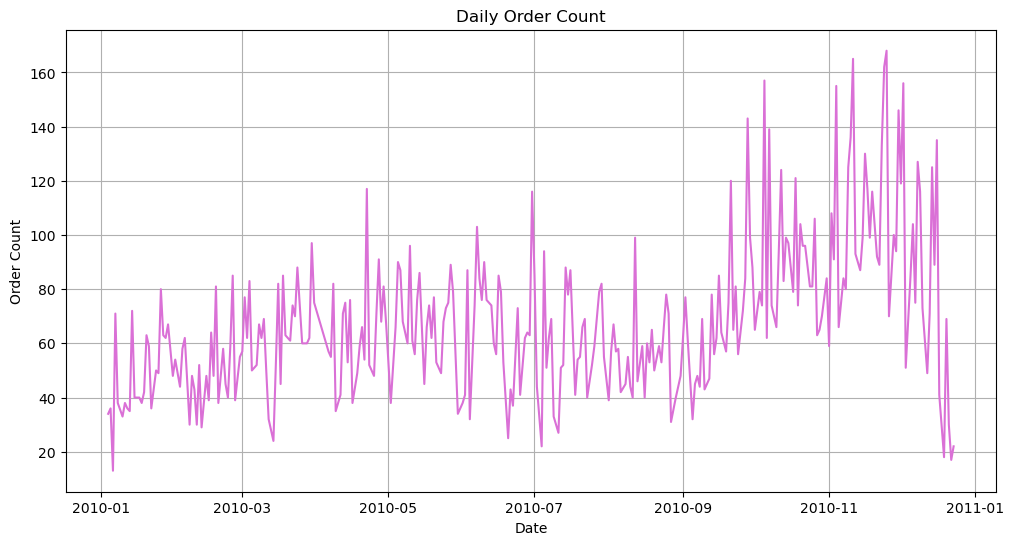

In [17]:

import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6),
                 dpi=100,
                 facecolor='#FFFFFF')
plt.style.use('default')
plt.plot(df_date_summary['order_date'],
         df_date_summary['order_count'],
         marker=None,
         color='orchid', 
         linestyle='-'
         )
plt.rcParams.update({'text.color':'black',
                     'axes.labelcolor':'black'})
plt.tick_params(axis='both', colors='black')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.title('Daily Order Count')
plt.grid(True)
plt.show()

### **5.3. Diagram Batang (_Bar Chart_)**


Mendapatkan variabel dengan dataframe yang memuat hasil agregasi dari suatu variabel atau kolom:


In [25]:
order_status_summary = (
   df_clean
   .groupby('order_status', as_index=False)
   .agg(order_count=('order_id','nunique'),
        total_quantity=('quantity','sum'),
        total_amount=('total_amt','sum'))
)

order_status_summary

,order_status,order_count,total_quantity,total_amount
0,cancelled,3684,98822,363704.520
1,delivered,16752,4214751,7021434.623


#### **5.3.1. Memunculkan visualisasi berupa diagram batang vertikal**


Memunculkan dataframe sebelum di visualisasi:


In [26]:
order_status_summary

,order_status,order_count,total_quantity,total_amount
0,cancelled,3684,98822,363704.520
1,delivered,16752,4214751,7021434.623


> Memvisualisasikan diagram batang secara vertikal menggunakan fungsi <code>plt.bar()</code>.


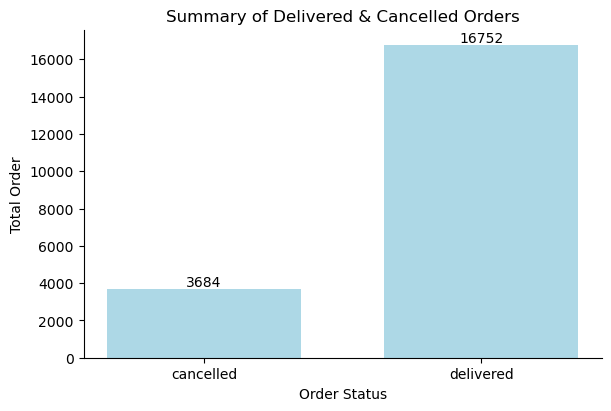

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(
        figsize=(6, 4),
        dpi=100, 
        layout='compressed',
        edgecolor=None,
        frameon=False,
        facecolor='white'
)
plt.bar(order_status_summary['order_status'],
        order_status_summary['order_count'],
        color='#ADD8E6',
        width= 0.7
)
plt.xlabel('Order Status')
plt.ylabel('Total Order')
plt.title('Summary of Delivered & Cancelled Orders')

# Menambahkan label nilai dari data untuk setiap kolomnya
for i, count in enumerate(order_status_summary['order_count']):
        plt.text(i, count, str(count), ha='center', va='bottom', fontweight='normal')

# Menghilangkan spine (mis. atas dan kanan)
for spine in plt.gca().spines.values():
        if spine.spine_type in ['top','right']:
                spine.set_visible(False)

# Mengatur latar belakang transparan
fig = plt.gcf()
fig.patch.set_alpha(0)
plt.show()

#### **5.3.2. Memunculkan visualisasi berupa diagram batang horizontal**


Memunculkan dataframe sebelum divisualisasi:


In [41]:
order_status_summary

,order_status,order_count,total_quantity,total_amount
0,cancelled,3684,98822,363704.520
1,delivered,16752,4214751,7021434.623


> Memvisualisasikan data dengan diagram batang horizontal menggunakan fungsi <code>plt.barh()</code>.


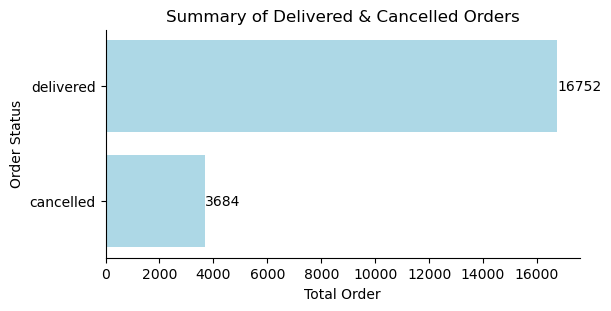

In [42]:

# mengimpor pyplot dari python
import matplotlib.pyplot as plt

# Membuat gambar baru atau mengaktivasi gambar yang sudah ada
fig = plt.figure(
        figsize=(6,3),
        dpi=100, 
        layout='compressed', 
        frameon=True,
        facecolor='white'
)

# Membuat diagram batang horizontal
plt.barh(order_status_summary['order_status'],
         order_status_summary['order_count'],
         color='#ADD8E6',
         edgecolor=None
)
plt.xlabel('Total Order')
plt.ylabel('Order Status')
plt.title('Summary of Delivered & Cancelled Orders')

# Menambahkan label nilai dari data untuk setiap kolomnya
for i, count in enumerate(order_status_summary['order_count']):
        plt.text(count, i, str(count), ha='left', va='center', fontweight='normal')
        
# Menghilangkan spine (mis. atas dan kanan)
for spine in plt.gca().spines.values():
        if spine.spine_type in ['top','right']:
                spine.set_visible(False)
plt.show()

### **5.4. Diagram Lingkaran (_Pie Chart_)**


Memunculkan dataframe sebelum di visualisasi:


In [51]:
order_status_summary

,order_status,order_count,total_quantity,total_amount
0,cancelled,3684,98822,363704.520
1,delivered,16752,4214751,7021434.623


> Memvisualisasikan data menggunakan diagram lingkaran dengan menggunakan fungsi <code>plt.pie()</code>.


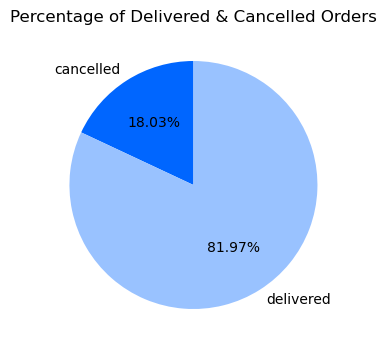

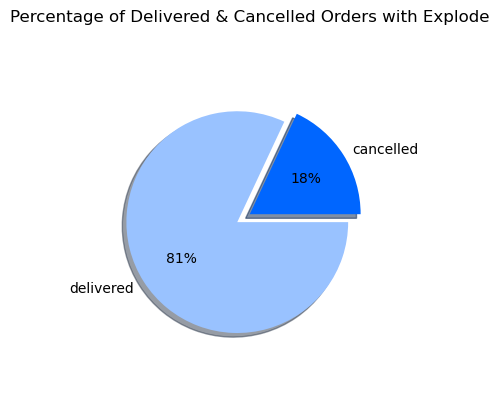

In [43]:
import matplotlib.pyplot as plt

# Membuat gambar baru 
fig = plt.figure(figsize=(4, 6))

# Membuat diagram lingkaran
plt.pie(order_status_summary['order_count'], 
        labels=order_status_summary['order_status'],
        startangle=90, 
        autopct='%1.2f%%', 
        colors=['#0066ff','#99c2ff']
)
plt.title('Percentage of Delivered & Cancelled Orders')

# Membuat diagram lingkaran dengan 'explode' pada output yang sama
# Membuat gambar baru dan axis
fig, ax= plt.subplots()

ax.pie(order_status_summary['order_count'],
       labels=order_status_summary['order_status'],
       explode=(0,0.1),
       autopct='%d%%',
       colors=['#0066ff','#99c2ff'],
       radius=0.75,
       shadow=True
)
plt.title('Percentage of Delivered & Cancelled Orders with Explode')
plt.show()

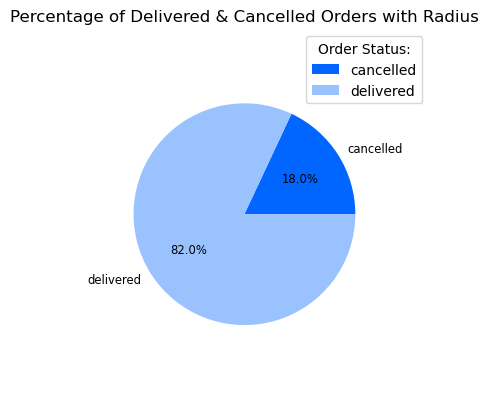

In [44]:
# Mendefinisikan warna dari diagram lingkaran
color = ['#0066ff','#99c2ff']

# Membuat gambar dan axis dengan radius tertentu
fig, ax = plt.subplots()
ax.pie(order_status_summary['order_count'],
       labels=order_status_summary['order_status'],
       colors=color,
       autopct='%1.1f%%',
       textprops={'size':'smaller'},
       radius=0.75
)
plt.title('Percentage of Delivered & Cancelled Orders with Radius')
plt.legend(title='Order Status:')
plt.show()

### **5.5. Histogram**

Memvisualisasikan data berupa histogram dengan menggunakan fungsi <code>plt.hist()</code>. Sebelum menggunakan fungsi disarankan untuk mengelompokkan data terlebih dahulu untuk mempermudah dalam pembuatan histogram.


Menampilkan statistik dasar untuk mempermudah dalam pengelompokkan data:


In [54]:
df_clean.describe().round(2)

,order_date,customer_id,quantity,price,total_amt
count,360828,360828.0,360828.00,360828.00,360828.00
mean,2010-07-22 05:55:24.100734720,15557.69,11.95,3.67,20.47
min,2010-01-04 09:43:00,12346.0,1.00,0.00,0.00
25%,2010-04-25 11:43:00,14210.0,2.00,1.25,4.25
50%,2010-08-02 14:24:00,15580.0,4.00,1.95,10.40
75%,2010-10-24 16:03:00,16938.0,12.00,3.75,17.70
max,2010-12-23 16:06:00,18287.0,10000.00,25111.09,25111.09
std,NaN,1593.68,68.51,70.38,97.74


#### **5.5.1. Memvisualisasi histogram dasar**


> Membuat histogram dasar dengan fungsi <code>plt.hist()</code>


Pembuatan histogram sebaiknya dilakukan dengan melakukan pengelompokkan data (_data binning_) terlebih dahulu.

Contoh menerapkan histogram untuk distribusi kuantitas dari produk yang berkaitan dengan teh pengelompokkan data menggunakan <code>np.linspace()</code>.


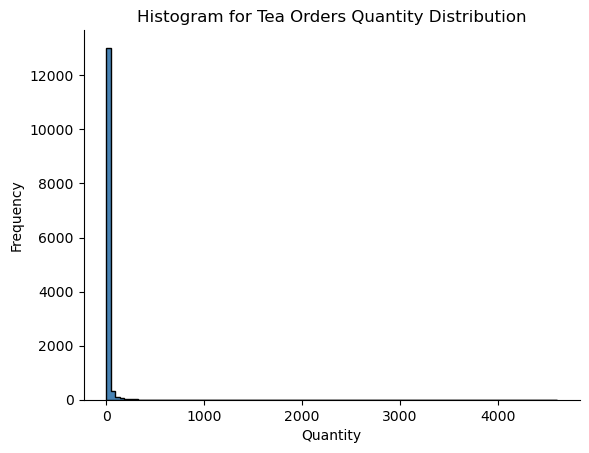

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Memfilter data
tea_data = df_clean.loc[df_clean['product_name'].str.contains('tea'),'quantity']

# Menentukan range dari data
min_quantity=tea_data.min()
max_quantity=tea_data.max()

# Memilih pengelompokkan data
num_bins = 100

# Membuat pengelompokkan dengan jarak yang sama
bins = np.linspace(min_quantity,max_quantity, num_bins + 1)

# Membuat histogram
plt.hist(tea_data,
         bins= bins,
         histtype='stepfilled',
         color='steelblue',
         edgecolor='black'
)
plt.title("Histogram for Tea Orders Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

# Menghilangkan spine (mis. atas dan kanan)
for spine in plt.gca().spines.values():
        if spine.spine_type in ['top','right']:
                spine.set_visible(False) 
plt.show()

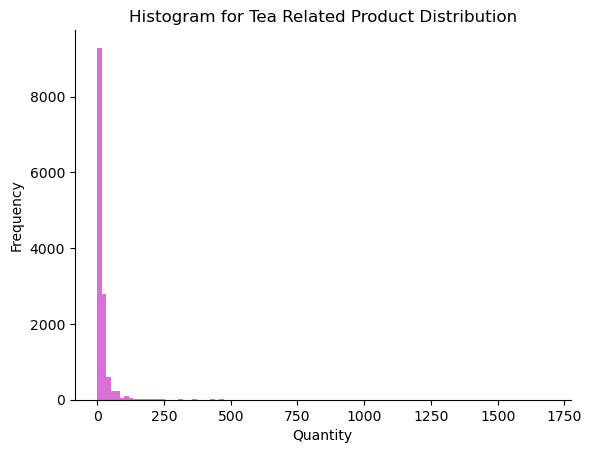

In [47]:
# Memfilter data
tea_data = df_clean.loc[df_clean['product_name'].str.contains('tea'),'total_amt']

# Menentukan range dari data
min_total_amt=tea_data.min()
max_total_amt=tea_data.max()

# Memilih pengelompokkan data
num_bins = 100

# Membuat pengelompokkan dengan jarak yang sama
bins = np.linspace(min_total_amt,max_total_amt, num_bins + 1)

# Membuat histogram
plt.hist(tea_data,
         bins= bins,
         histtype='stepfilled',
         color='orchid',
         edgecolor=None
)
plt.title("Histogram for Tea Related Product Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

# Menghilangkan spine (mis. atas dan kanan)
for spine in plt.gca().spines.values():
        if spine.spine_type in ['top','right']:
                spine.set_visible(False) 
plt.show()

#### **5.5.2. Memvisualisasi histogram dengan mengelompokkan data terlebih dahulu**


Memvisualisasikan data menggunakan histogram dengan mengelompokkannya terlebih dahulu menggunakan <code>pd.interval_range()</code>

> Membuat histogram dengan pengelompokkan data (_binning_) menggunakan <code>pd.interval_range()</code>.

Sebelum membuat histogram perlu dipastikan untuk membuat pengelompokkan data (_binning_) terlebih dahulu untuk mempermudah analisis. Berikut ini merupakan contoh penerapannya untuk dataframe yang memiliki kaitan dengan 'tea':


In [48]:

import pandas as pd
import numpy as np

# Memfilter data
tea_data = pd.DataFrame({
  'tea_quantity':df_clean.loc[df_clean['product_name'].str.contains('tea'),'quantity']
})

# Menentukan nilai minimum dan maximum dari intercal
min_quantity = tea_data.loc[:,'tea_quantity'].min()
max_quantity = tea_data.loc[:,'tea_quantity'].max()

# Pengelompokkan data
freq=25
bins = pd.interval_range(
  start=0, 
  end=525,
  freq=freq, 
  closed='right'
)
tea_data['intervals'] = pd.cut(
  tea_data['tea_quantity'],
  bins=bins,
  include_lowest=True
)
tea_data.head()

,tea_quantity,intervals
5,12,"(0, 25]"
7,3,"(0, 25]"
17,12,"(0, 25]"
53,1,"(0, 25]"
97,2,"(0, 25]"


> Menampilkan ringkasan dari pengelompokkan data:


In [49]:
tea_data_summary = (
  tea_data
  .groupby('intervals', observed=True, as_index=False)
  .agg(interval_counts = pd.NamedAgg(column='intervals',aggfunc='count'))
)
tea_data_summary

,intervals,interval_counts
0,"(0, 25]",12881
1,"(25, 50]",293
2,"(50, 75]",154
3,"(75, 100]",36
4,"(100, 125]",59
5,"(125, 150]",64
6,"(150, 175]",2
7,"(175, 200]",4
8,"(200, 225]",16
9,"(225, 250]",12


> Menampilkan histogram setelah melakukan pengelompokkan data dengan <code>plt.bar()</code>.


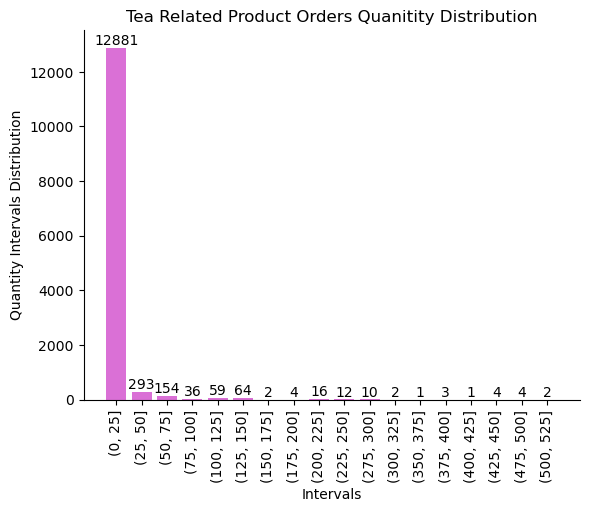

In [51]:
plt.bar(tea_data_summary['intervals'].astype(str),
        tea_data_summary['interval_counts'],
        edgecolor=None,
        color='orchid'
)
plt.xlabel('Intervals')
plt.ylabel('Quantity Intervals Distribution')
plt.title('Tea Related Product Orders Quanitity Distribution')
plt.xticks(rotation=90)

for i, count in enumerate(tea_data_summary['interval_counts']):
        plt.text(i, count, str(count), ha='center', va='bottom', fontweight='normal')

for spine in plt.gca().spines.values():
        if spine.spine_type in ['top','right']:
                spine.set_visible(False) 
plt.show()

### **5.5. Diagram Sebar (_scatter plot_)**

Biasanya diagram sebar ini dapat digunakan dalam analisis untuk korelasi, pada contoh kali ini diagram sebar digunakan untuk memvisualisasikan sebaran data untuk dua variabel tertentu:


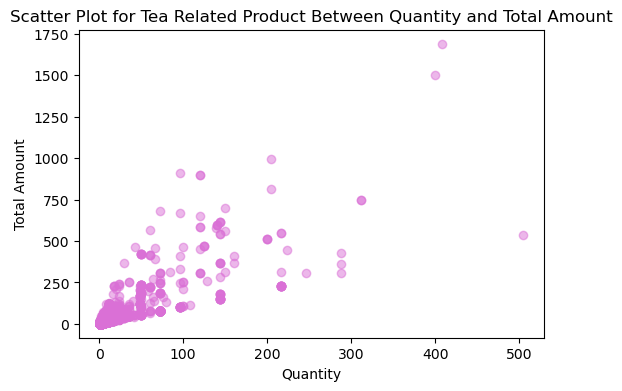

In [52]:
import matplotlib.pyplot as plt

df_tea = df_clean[
  (df_clean['product_name'].str.contains('tea')) & (df_clean['price'] >=1)
]
variable_x = df_tea['quantity']
variable_y = df_tea['total_amt']
fig = plt.figure(figsize=(6, 4))
plt.scatter(variable_x, variable_y, c='orchid', marker='o', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Scatter Plot for Tea Related Product Between Quantity and Total Amount')
plt.show()

### **5.6. Diagram Kotak Garis (_Box Plot_)**

Diagram ini biasanya digunakan untuk mencari _outlier_ dalam data dari suatu variabel.


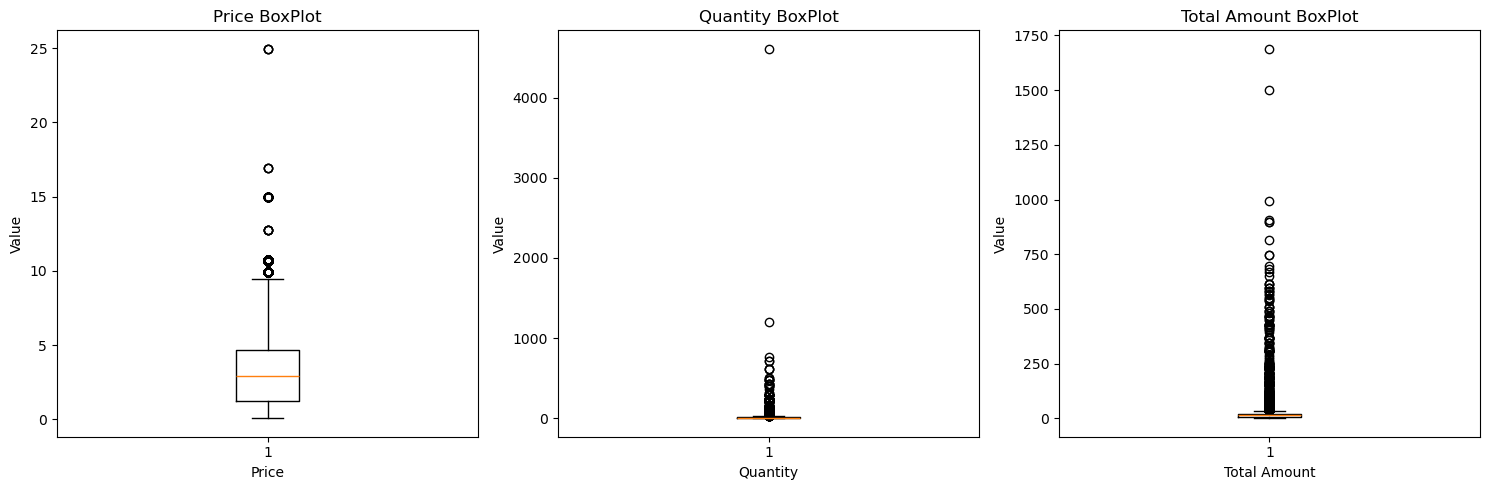

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Membuat filter
df_tea = df_clean[df_clean['product_name'].str.contains('tea')]
variable_1 = df_tea['price']
variable_2 = df_tea['quantity']  
variable_3 = df_tea['total_amt']  

# Membuat subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Mentukan tiga kolom

# Membuat box plots
axs[0].boxplot(variable_1)
axs[0].set_title('Price BoxPlot')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Value')

axs[1].boxplot(variable_2)
axs[1].set_title('Quantity BoxPlot')
axs[1].set_xlabel('Quantity')
axs[1].set_ylabel('Value')

axs[2].boxplot(variable_3)
axs[2].set_title('Total Amount BoxPlot')
axs[2].set_xlabel('Total Amount')
axs[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

## **6. _Explorator Data Analysis_ (EDA): Analisis Data - Analisis Korelasi**


### **6.1. Korelasi antara dua variabel**


#### **6.1.1. Menghitung angka korelasi antar variabel**

Analisis korelasi antara dua variabel dengan menggunakan fungsi

> <code>pd.DataFrame.corr(method='???',min_periods=1, numeric_only=True)</code>

Dengan:

1. Method: {‘pearson’, ‘kendall’, ‘spearman’} atau callable:
   - **'pearson'**: Computes Pearson’s correlation coefficient (default).
   - **'kendall'**: Kendal Tau correlation coefficient.
   - **'spearman'**: Spearman rank correlation coefficient.
2. min_periods: int, opsional
3. numeric_oly: bool


In [12]:
title = "Correlation Coefficient Between Price and Total Amount:"
title1= "Correlation Coefficeint Between Quantity and Total Amount"
variable_x = df_clean['price']
variable_y = df_clean['quantity']
variable_z = df_clean['total_amt']
correlation_coef= variable_x.corr(variable_z, method='pearson')
correlation_coef1= variable_y.corr(variable_z, method='pearson')
print(f"{title}\n{correlation_coef:.2f}\n\n{title1}\n{correlation_coef1:.2f}")

Correlation Coefficient Between Price and Total Amount:
0.72

Correlation Coefficeint Between Quantity and Total Amount
0.37


Cara menginterpretasikan hasil:

- Positif koefisien korelasi mengindikasikan jika salah satu variabel naik, maka yang satunya akan ikut naik.
- Negatif koefisien korelasi mengindikasikan jika salah satu variabel naik, maka variabel lainnya akan turun.
- Besarnya (nilai absolut) koefisien menunjukkan kekuatan hubungan. Nilai yang mendekati +1 atau -1 menunjukkan korelasi yang lebih kuat.

Yang dicari:

- Jika correlation_coef mendekati +1, artinya harga yang lebih tinggi berkaitan dengan jumlah total yang lebih tinggi yang dibelanjakan.
- Jika correlation_coef1 mendekati -1, artinya jumlah yang lebih tinggi yang dibeli berkaitan dengan jumlah total yang lebih rendah yang dibelanjakan.

Konsiderasi:

- Korelasi tidak menyiratkan sebab akibat. Koefisien ini hanya menangkap hubungan linear; faktor lain mungkin berperan.
- Selalu periksa konteks dan pengetahuan domain. Misalnya, dalam penjualan eceran, harga dan kuantitas mungkin terkait karena adanya diskon atau promosi.


#### **6.1.2. Memvisualisasi korelasi antar variabel**


**a. Memvisualisasi korelasi menggunakan fungsi <code>stats.pearsonr()</code> dan <code>plt.scatter()</code>**

Korelasi pada <code>scipy.stats.pearsonr()</code>

> $$[ r = \frac{\sum (x - m_x)(y - m_y)}{\sqrt{\sum (x - m_x)^2} \sqrt{\sum (y - m_y)^2}} ]$$

Keterangan:

- $r$ adalah korelasi Pearson (antara -1 hingga 1)
- $m_x$ adalah mean dari vektor x
- $m_y$ adalah mean dari vektor y

Koefisien Korelasi Pearson:
Koefisien korelasi Pearson mengukur hubungan linier antara dua variabel.
Nilainya berkisar antara -1 hingga +1:

- 0: Tidak ada korelasi.
- +1: Korelasi positif sempurna (saat satu variabel naik, yang lain juga naik).
- -1: Korelasi negatif sempurna (saat satu variabel naik, yang lain turun).

Fungsi pearsonr:

Argumen:

- x dan y: Dua array (atau list) yang ingin kita korelasikan.
- alternative: Opsi untuk hipotesis alternatif (default: ‘two-sided’).
- method: Metode perhitungan nilai p-value (default: None).

Hasil Keluaran:

Tuple berisi:

- Koefisien korelasi (nilai antara -1 hingga +1).
- Nilai p-value (probabilitas sistem tak berkorelasi menghasilkan koefisien korelasi setidaknya se-ekstrem yang dihitung dari data ini).


Correlation Coefficient Between Price and Total Amount:
0.72

Correlation p-value:
0.000000000000000
Correlation is significant at the 95% confidence level.


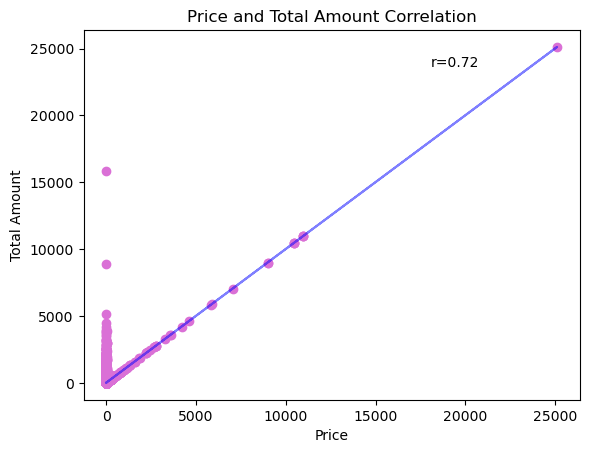

In [18]:

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

variable_x = df_clean['price']
variable_y = df_clean['quantity']
variable_z = df_clean['total_amt']

# Mengatur signifikansi level (alpha)
alpha= 0.05
r, p = stats.pearsonr(variable_x, variable_z)

# Mendefinisikan koefisien korelasi
correlation_coef= variable_x.corr(variable_z)

# Mendefinisikan judul
title1 = "Correlation Coefficient Between Price and Total Amount:"
title2 = "Correlation p-value:"

# Memvisualisasikan korelasi dengan diagram sebar
plt.figure(facecolor='white')
plt.scatter(variable_x, variable_z, color='orchid')
plt.xlabel('Price')
plt.ylabel('Total Amount')
plt.title('Price and Total Amount Correlation')
plt.annotate(
  f"r={r:.2f}",
  xy=(0.70,0.9),
  xycoords="axes fraction"
)

# Menyesuaikan garis regresi linear
slope, intercept, _,_,_ = stats.linregress(variable_x,variable_z)
regression_line = slope * variable_x + intercept
plt.plot(
  variable_x, 
  regression_line, 
  color='blue', 
  label="Regression Line",
  alpha=0.5
)
# Membuat pernyataan kasus untuk korelasi yang signifikan
if p < alpha:
  significance_statement=f"Correlation is significant at the {100*(1-alpha):.0f}% confidence level."
else:
  significance_statement="Correlation is not statistically significant."

print(f"{title1}\n{correlation_coef:.2f}\n\n{title2}\n{p:.15f}\n{significance_statement}")
plt.show()

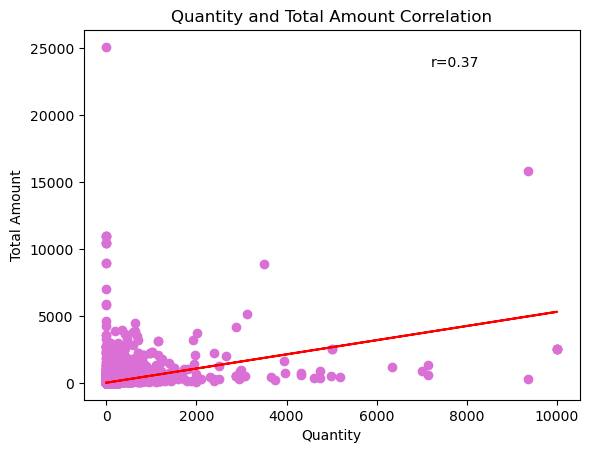

Correlation Coefficient Between Price and Total Amount:
0.37


In [58]:

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

variable_x = df_clean['price']
variable_y = df_clean['quantity']
variable_z = df_clean['total_amt']

r, p = stats.pearsonr(variable_y, variable_z)

plt.scatter(variable_y, variable_z, c='orchid')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('Quantity and Total Amount Correlation')
plt.annotate(
  f"r={r:.2f}",
  xy=(0.70,0.9),
  xycoords="axes fraction"
)
slope, intercept, _,_,_ = stats.linregress(variable_y,variable_z)
regression_line = slope * variable_y + intercept
plt.plot(
  variable_y, 
  regression_line,
  color='red', 
  label="Regression Line"
)
plt.show()
correlation_coef1= variable_y.corr(variable_z)
print(f"{title1}\n{correlation_coef1:.2f}")

**b. Memvisualisasi korelasi menggunaka fungsi <code>sns.load_dataset()</code> dan corellogram dasar dengan <code>sns.pairplot()</code>**


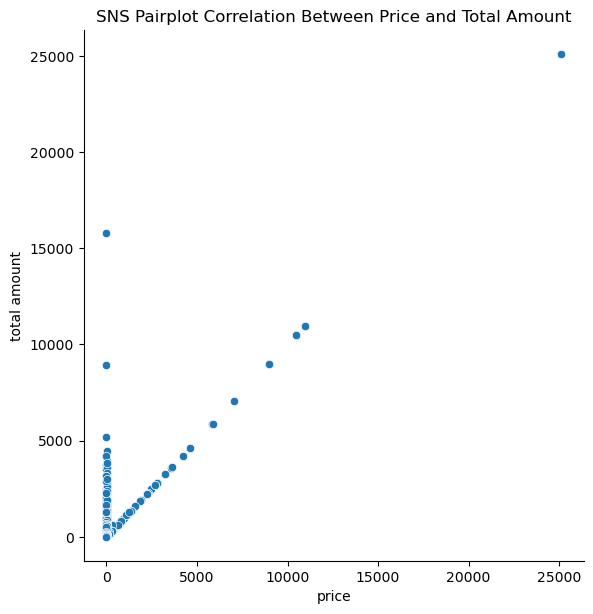

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df_clean,
    x_vars=["price"],
    y_vars=["total_amt"],
    height=6,
    aspect=1,
    markers="o",
)
plt.title('SNS Pairplot Correlation Between Price and Total Amount')
plt.xlabel("price")
plt.ylabel("total amount")
plt.show()

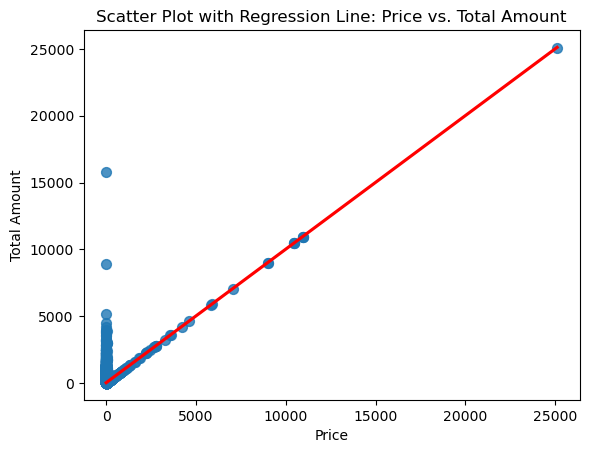

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x="price",
    y="total_amt",
    data=df_clean,
    scatter_kws={"s": 50},  # Customize marker size (optional)
    line_kws={"color": "red"}  # Customize regression line color (optional)
)
plt.title('Scatter Plot with Regression Line: Price vs. Total Amount')
plt.xlabel('Price')
plt.ylabel('Total Amount')
plt.show()

> Contoh lain dalam penerapan visualisasi menggunakan <code>Seaborn</code> dan <code>matplotlib.pyplot</code>


<Figure size 400x600 with 0 Axes>

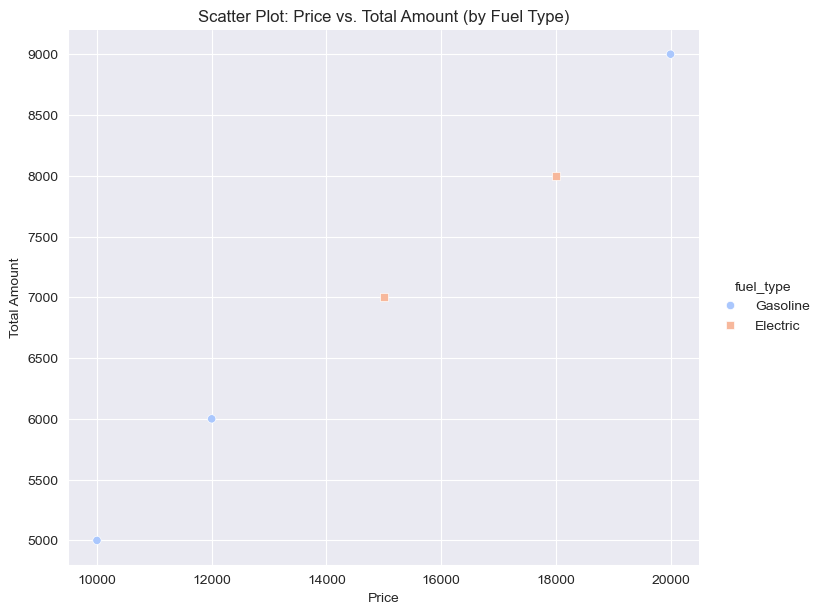

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume df_clean contains columns: "price", "total_amt", and "fuel_type"
# Let's create a hypothetical DataFrame for demonstration purposes:
df_test = pd.DataFrame({
    "price": [10000, 15000, 12000, 18000, 20000],
    "total_amt": [5000, 7000, 6000, 8000, 9000],
    "fuel_type": ["Gasoline", "Electric", "Gasoline", "Electric", "Gasoline"]
})

# Set the style and figure size
sns.set_style("darkgrid")
plt.figure(
    figsize=(4, 6),
    color=None
)

# Create the pair plot with hue
sns.pairplot(
    df_test,
    x_vars=["price"],
    y_vars=["total_amt"],
    hue="fuel_type",  # Specify the categorical variable
    height=6,
    aspect=1.2,
    markers=["o", "s"],
    palette="coolwarm", # Customize marker styles for each category
)

# Customize axis labels and title
plt.xlabel("Price")
plt.ylabel("Total Amount")
plt.title("Scatter Plot: Price vs. Total Amount (by Fuel Type)")
plt.show()

### **6.2. Korelasi antara lebih dari dua variabel**


> Analisis korelasi untuk lebih dari dua variabel dapat divisualisasikan menggunakan _heatmap correlation matirx_ dengan seaborn menggunakan fungsi <code>sns.heatmap(DataFrame.corr())</code>


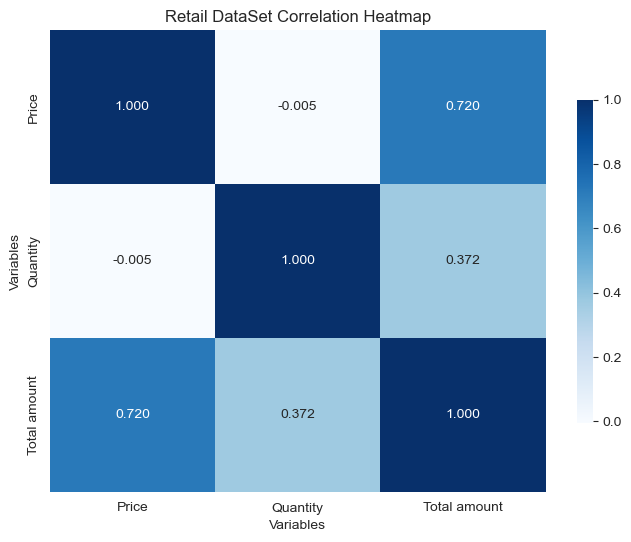

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_new= pd.DataFrame({
  'Price': df_clean['price'],
  'Quantity': df_clean['quantity'],
  'Total amount': df_clean['total_amt']
})
correlation = df_new.corr()

# Membuat gambar dengan latar warna
plt.figure(
  figsize=(8,6),
  facecolor=None
)
axis_correlation = sns.heatmap(
  correlation,
  cmap = 'Blues',
  annot=True, 
  fmt=".3f", # Memformat anotasi ke dua desimal
  linewidths=0, # Menambahkan grid line antar sel
  square=False, # Membuat sel menjadi kotak
  cbar_kws={"shrink": 0.7} # Mengatur bentuk dari bar warna
)
axis_correlation.set_title("Retail DataSet Correlation Heatmap")
plt.xlabel("Variables") # Menambahkan nama x label
plt.ylabel("Variables") # Menambahkan nama y label
plt.show()